In [1]:
import pandas as pd
import numpy as np
from time import sleep
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
matches = pd.read_csv('./Data/matches.csv', sep=';')
teams = pd.read_csv('./Data/teams.csv')
players = pd.read_csv('./Data/players.csv')

Começando com a tabela referente às partidas, tentei identificar os outliers utilizando a técnica z-score. Para isso, fiz um loop passando por cada coluna numérica e plotei um gráfico para cada, mostrando os limites de outliers e, em azul, os dados e, em vermelho, os outliers.

In [ ]:
matches = matches.query('status == "complete"') #Filtra apenas as partidas que já ocorreram

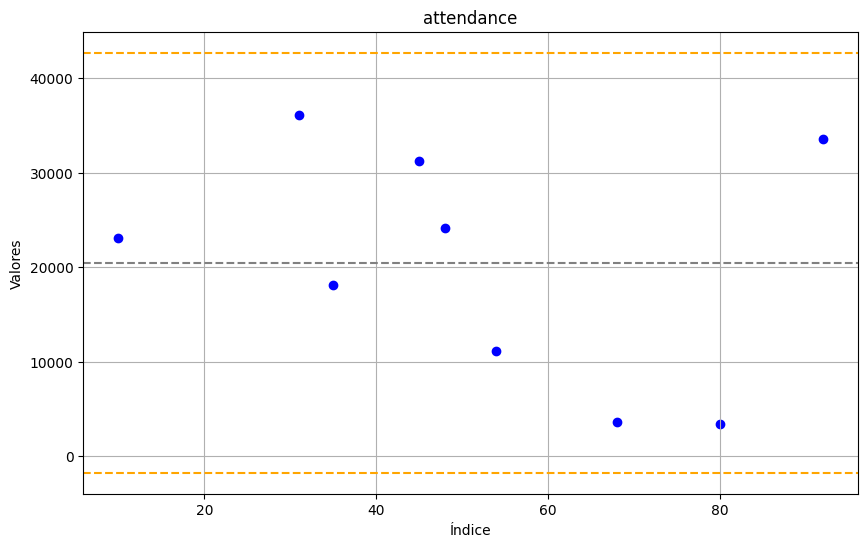

KeyboardInterrupt: 

In [14]:
for col in matches.columns:
    # Verifica se a coluna é numérica
    if np.issubdtype(matches[col].dtype, np.number):
        mean = matches[col].mean()
        std_dev = matches[col].std()

        matches['z_score'] = (matches[col] - mean) / std_dev
        threshold = 1.8
        matches['is_outlier'] = np.abs(matches['z_score']) > threshold

        plt.figure(figsize=(10, 6))

        # Plotar todos os pontos
        plt.scatter(matches.index, matches[col], color='blue', label='Valores')

        # Plotar os outliers
        plt.scatter(matches[matches['is_outlier'].astype(bool)].index,
                    matches[matches['is_outlier'].astype(bool)][col],
                    color='red', label='Outliers', marker='o', edgecolor='black')

        # Adicionar títulos e legendas
        plt.title(col)
        plt.xlabel('Índice')
        plt.ylabel('Valores')
        plt.axhline(y=mean, color='gray', linestyle='--', label='Média')
        plt.axhline(y=mean + threshold * std_dev, color='orange', linestyle='--', label='Limite Superior (Média + 3*Desvio Padrão)')
        plt.axhline(y=mean - threshold * std_dev, color='orange', linestyle='--', label='Limite Inferior (Média - 3*Desvio Padrão)')
        # plt.legend()
        plt.grid(True)

        # Mostrar o gráfico
        plt.show()
        sleep(2)
        clear_output(wait=True)  # Clears the output after each iteration

        # Substitui pela média:
        matches.loc[matches['is_outlier'], col] = mean

        if std_dev == 0:
            matches = matches.drop(columns=[col])



# Removendo as colunas auxiliares
matches = matches.drop(columns=['z_score', 'is_outlier'])

matches.to_csv('./Data/partidas.csv')

Após a execução, percebi que, estatisticamente, seria uma boa abordagem trocá-los pelas médias, assim, criei outro loop para isso. Removendo os outliers (substituindo-os pelas médias) e as colunas auxiliares. (adicionei diretamente no loop já realizado)


Agora, faremos o mesmo com as outras tabelas:

Agora, realizei o mesmo processo para a tabela referente aos times

In [ ]:
for col in teams.columns:
    # Verifica se a coluna é numérica
    if np.issubdtype(teams[col].dtype, np.number):
        mean = teams[col].mean()
        std_dev = teams[col].std()

        teams['z_score'] = (teams[col] - mean) / std_dev
        threshold = 2.5
        teams['is_outlier'] = np.abs(teams['z_score']) > threshold

        plt.figure(figsize=(10, 6))

        # Plotar todos os pontos
        plt.scatter(teams.index, teams[col], color='blue', label='Valores')

        # Plotar os outliers
        plt.scatter(teams[teams['is_outlier'].astype(bool)].index,
                    teams[teams['is_outlier'].astype(bool)][col],
                    color='red', label='Outliers', marker='o', edgecolor='black')

        # Adicionar títulos e legendas
        plt.title(col)
        plt.xlabel('Índice')
        plt.ylabel('Valores')
        plt.axhline(y=mean, color='gray', linestyle='--', label='Média')
        plt.axhline(y=mean + threshold * std_dev, color='orange', linestyle='--', label='Limite Superior (Média + 3*Desvio Padrão)')
        plt.axhline(y=mean - threshold * std_dev, color='orange', linestyle='--', label='Limite Inferior (Média - 3*Desvio Padrão)')
        # plt.legend()
        plt.grid(True)

        # Mostrar o gráfico
        plt.show()
        sleep(2)
        clear_output(wait=True)  # Clears the output after each iteration

        # Substitui pela média:
        teams.loc[teams['is_outlier'], col] = mean

        if std_dev == 0:
            teams = teams.drop(columns=[col])



# Removendo as colunas auxiliares
teams = teams.drop(columns=['z_score', 'is_outlier'])

teams.to_csv('./Data/times.csv')

In [12]:
for col in players.columns:
    # Verifica se a coluna é numérica
    if np.issubdtype(players[col].dtype, np.number):
        mean = players[col].mean()
        std_dev = players[col].std()

        if std_dev == 0:
            players = players.drop(columns=[col])

players.to_csv('./Data/jogadores.csv')

dtype('float64')